In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from tensorflow.keras import layers, models

In [22]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])

In [23]:
train_t

array([ 5.2,  5.7,  8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1,
        6.6])

In [24]:
train_t = train_t.reshape([12, 1])
train_t

array([[ 5.2],
       [ 5.7],
       [ 8.6],
       [14.9],
       [18.2],
       [20.4],
       [25.5],
       [26.4],
       [22.8],
       [17.5],
       [11.1],
       [ 6.6]])

In [26]:
train_x = np.array([[mon**n for n in range(1, 5)] for mon in range(1, 13)])
train_x

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

In [42]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(4,), name='polynomial'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
polynomial (Dense)           (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam', loss='mse')

In [44]:
history = model.fit(train_x, train_t, batch_size=12, epochs=10)

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 0s 14ms/sample - loss: 45332000.0000
Epoch 2/10
12/12 [==============================] - 0s 81us/sample - loss: 45210276.0000
Epoch 3/10
12/12 [==============================] - 0s 77us/sample - loss: 45088720.0000
Epoch 4/10
12/12 [==============================] - 0s 67us/sample - loss: 44967340.0000
Epoch 5/10
12/12 [==============================] - 0s 65us/sample - loss: 44846132.0000
Epoch 6/10
12/12 [==============================] - 0s 66us/sample - loss: 44725100.0000
Epoch 7/10
12/12 [==============================] - 0s 66us/sample - loss: 44604248.0000
Epoch 8/10
12/12 [==============================] - 0s 76us/sample - loss: 44483572.0000
Epoch 9/10
12/12 [==============================] - 0s 70us/sample - loss: 44363084.0000
Epoch 10/10
12/12 [==============================] - 0s 64us/sample - loss: 44242780.0000


In [45]:
history = model.fit(train_x, train_t,
                    batch_size=12, epochs=100000, verbose=0)

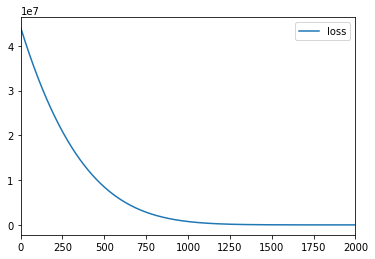

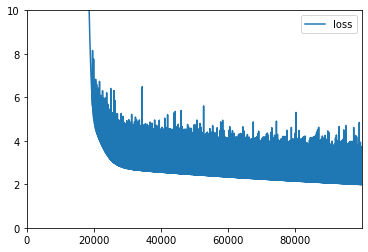

In [46]:
DataFrame({'loss': history.history['loss']}).plot(xlim=(0, 2000))
DataFrame({'loss': history.history['loss']}).plot(ylim=(0, 10))

In [47]:
model.get_weights()

[array([[-0.6408625 ],
        [ 1.5044377 ],
        [-0.17007719],
        [ 0.00420621]], dtype=float32), array([2.858854], dtype=float32)]

In [48]:
w, b = model.get_weights()
def predict(x):
    pred = b[0] + sum([w[n][0] * x**(n+1) for n in range(0, 4)])
    return pred

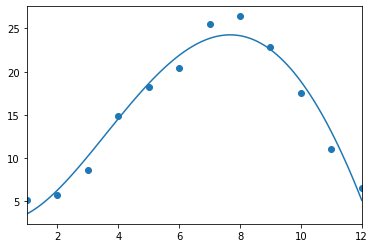

In [49]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)

In [50]:
print(tf.__version__)

2.0.0
